In [1]:
# Setup & Import 

# Core imports
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Settings
sns.set(style="whitegrid")

In [2]:
# Load the dataset

# Use a raw string (r"...") to avoid issues with backslashes in Windows paths
fasta_path = r"C:\Users\bruna\Desktop\Data Science Projects\gc-content-analyzer\data\ecoli_genomic.fna"

# Parse sequences from FASTA
sequences = list(SeqIO.parse(fasta_path, "fasta"))
print(f"Loaded {len(sequences)} sequence record(s)")



Loaded 1 sequence record(s)


In [3]:
# Function to calculate GC content

def gc_content(seq):
    seq = seq.upper()
    g = seq.count("G")
    c = seq.count("C")
    return round((g + c) / len(seq) * 100, 2)

gc_values = [
    {"id": record.id, "gc_percent": gc_content(record.seq)}
    for record in sequences
]

gc_values[:5]  # preview


[{'id': 'NC_000913.3', 'gc_percent': 50.79}]

C:\Users\bruna\AppData\Local\Temp\ipykernel_26752\1139648229.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="id", y="gc_percent", palette="viridis")


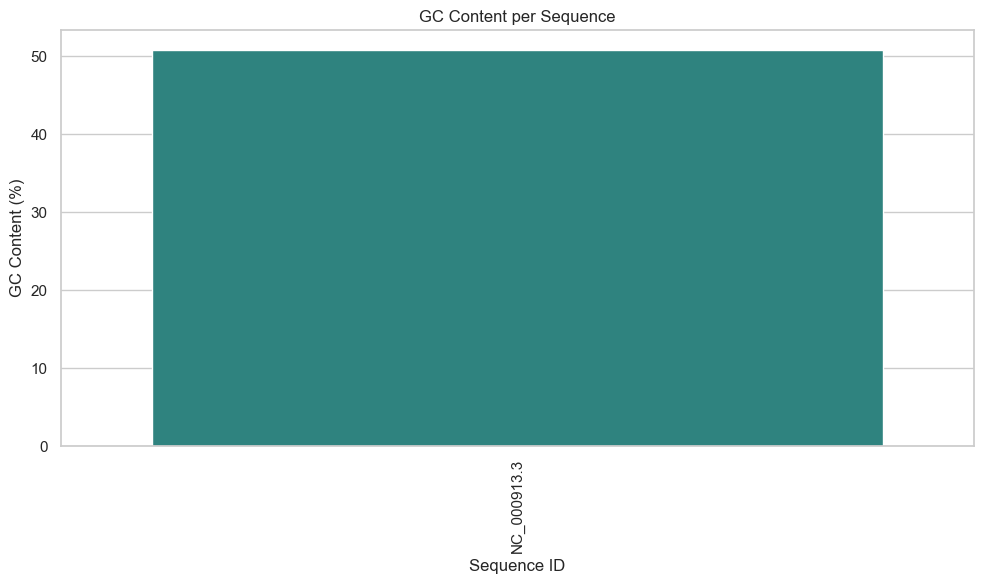

In [4]:
# Plotting the GC content

# Convert to DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame(gc_values)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="id", y="gc_percent", palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("GC Content (%)")
plt.xlabel("Sequence ID")
plt.title("GC Content per Sequence")
plt.tight_layout()
plt.show()


In [5]:
# Save results to CSV

results_path = os.path.join("..", "results", "gc_content_results.csv")
df.to_csv(results_path, index=False)
print(f"Results saved to {results_path}")


Results saved to ..\results\gc_content_results.csv


# Section 2 – GC% by Gene from GenBank

In [6]:
# Path to your GenBank file
gb_path = r"C:\Users\bruna\Desktop\Data Science Projects\gc-content-analyzer\data\ecoli_genomic.gbff"

gene_gc_data = []

# Parse the GenBank file
for record in SeqIO.parse(gb_path, "genbank"):
    for feature in record.features:
        if feature.type == "CDS":  # Coding sequence
            seq = feature.extract(record.seq)
            gc = (seq.count("G") + seq.count("C")) / len(seq) * 100 if len(seq) > 0 else 0
            locus_tag = feature.qualifiers.get("locus_tag", ["N/A"])[0]
            gene = feature.qualifiers.get("gene", ["N/A"])[0]
            gene_gc_data.append({
                "locus_tag": locus_tag,
                "gene": gene,
                "gc_percent": round(gc, 2),
                "length_bp": len(seq)
            })

df_genes = pd.DataFrame(gene_gc_data)
df_genes.head()


,locus_tag,gene,gc_percent,length_bp
0,b0001,thrL,51.52,66
1,b0002,thrA,53.07,2463
2,b0003,thrB,56.27,933
3,b0004,thrC,52.84,1287
4,b0005,yaaX,53.87,297


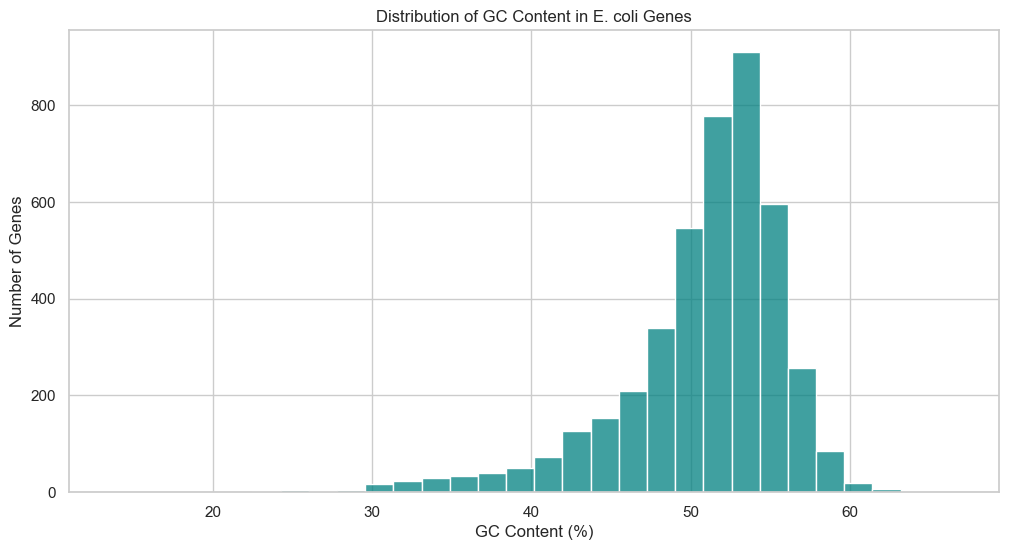

In [7]:
# Plotting the distribution of GC content in E. coli genes

plt.figure(figsize=(12, 6))
sns.histplot(df_genes['gc_percent'], bins=30, color='teal')
plt.xlabel("GC Content (%)")
plt.ylabel("Number of Genes")
plt.title("Distribution of GC Content in E. coli Genes")
plt.show()


# Section 3 – Amino Acid Analysis from Protein FASTA 

In [8]:
# Path to your protein FASTA
protein_path = r"C:\Users\bruna\Desktop\Data Science Projects\gc-content-analyzer\data\ecoli_proteins.faa"

aa_freq_data = {}

for record in SeqIO.parse(protein_path, "fasta"):
    seq = str(record.seq)
    for aa in seq:
        aa_freq_data[aa] = aa_freq_data.get(aa, 0) + 1

# Convert to DataFrame for plotting
df_aa = pd.DataFrame(list(aa_freq_data.items()), columns=["AminoAcid", "Count"])
df_aa['Frequency'] = df_aa['Count'] / df_aa['Count'].sum()

df_aa.sort_values("Frequency", ascending=False, inplace=True)
df_aa.head()


,AminoAcid,Count,Frequency
10,L,142379,0.107053
8,A,126893,0.095410
6,G,97830,0.073557
9,V,94237,0.070856
3,I,79950,0.060114


C:\Users\bruna\AppData\Local\Temp\ipykernel_26752\2509178392.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AminoAcid", y="Frequency", data=df_aa, palette="viridis")


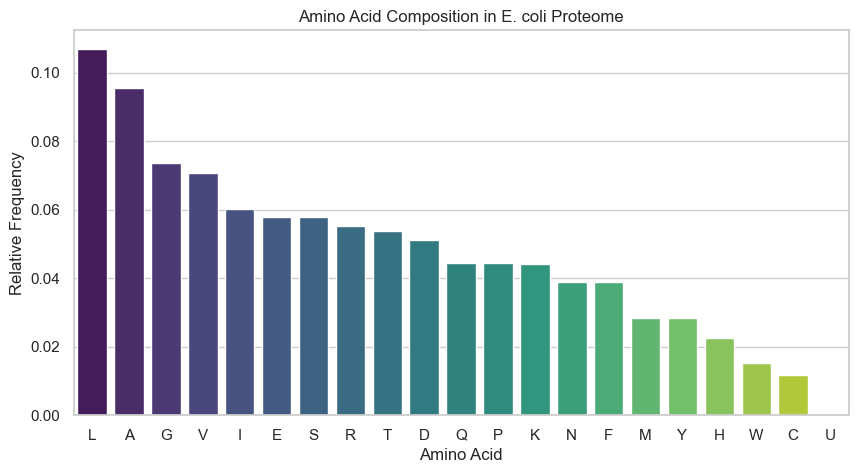

In [9]:
# Plotting the amino acid composition

plt.figure(figsize=(10, 5))
sns.barplot(x="AminoAcid", y="Frequency", data=df_aa, palette="viridis")
plt.ylabel("Relative Frequency")
plt.xlabel("Amino Acid")
plt.title("Amino Acid Composition in E. coli Proteome")
plt.show()
